# Рубежный контроль № 1 
## Методы обработки данных
### Вариант № 4 
### Задание № 1

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style = 'ticks')

#### Импортируем датасет

In [115]:
data = pd.read_csv('toy_dataset.csv')

In [107]:
data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [61]:
data['City'].unique()

array(['Dallas', 'New York City', 'Los Angeles', 'Mountain View',
       'Boston', 'Washington D.C.', 'San Diego', 'Austin'], dtype=object)

In [6]:
data.shape

(150000, 6)

In [12]:
data.dtypes

Number       int64
City        object
Gender      object
Age          int64
Income     float64
Illness     object
dtype: object

#### Проверим наличе пропусков в данных

In [5]:
for col in data.columns:
    count = data[data[col].isnull()].shape[0]
    print('{}  -  {}'.format(col, count))

Number  -  0
City  -  0
Gender  -  0
Age  -  0
Income  -  0
Illness  -  0


#### Преобразуем категориальные признаки

In [18]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#### Закодируем категориальные признаки числовыми с помощью метода Label Encoding

In [133]:
leCity = LabelEncoder()
city = leCity.fit_transform(data['City'])
np.unique(city)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [134]:
leCity.inverse_transform([0, 1, 2, 3, 4 ,5 ,6 , 7 ])

array(['Austin', 'Boston', 'Dallas', 'Los Angeles', 'Mountain View',
       'New York City', 'San Diego', 'Washington D.C.'], dtype=object)

In [144]:
city = pd.DataFrame({'City':city.T})
city

,City
0,2
1,2
2,2
3,2
4,2
...,...
149995,0
149996,0
149997,0
149998,0


In [135]:
leGender = LabelEncoder()
gender = leGender.fit_transform(data['Gender'])
np.unique(gender)

array([0, 1])

In [136]:
gender = pd.DataFrame({'Gender':gender.T})
gender

,Gender
0,1
1,1
2,1
3,1
4,1
...,...
149995,1
149996,1
149997,1
149998,1


In [137]:
leIllness = LabelEncoder()
illness = leIllness.fit_transform(data['Illness'])
np.unique(gender)

array([0, 1])

In [138]:
illness = pd.DataFrame({'Illness':illness.T})
illness

,Illness
0,0
1,0
2,0
3,0
4,0
...,...
149995,0
149996,0
149997,0
149998,0


In [139]:
del data['City']
del data['Gender']
del data['Illness']
data 

,Number,Age,Income
0,1,41,40367.0
1,2,54,45084.0
2,3,42,52483.0
3,4,40,40941.0
4,5,46,50289.0
...,...,...,...
149995,149996,48,93669.0
149996,149997,25,96748.0
149997,149998,26,111885.0
149998,149999,25,111878.0


In [146]:
#merge = data.join(city)
merge = merge.join(gender)
merge = merge.join(illness)
merge

,Number,Age,Income,City,Gender,Illness
0,1,41,40367.0,2,1,0
1,2,54,45084.0,2,1,0
2,3,42,52483.0,2,1,0
3,4,40,40941.0,2,1,0
4,5,46,50289.0,2,1,0
...,...,...,...,...,...,...
149995,149996,48,93669.0,0,1,0
149996,149997,25,96748.0,0,1,0
149997,149998,26,111885.0,0,1,0
149998,149999,25,111878.0,0,1,0


In [152]:
del merge['Number']
merge

,Age,Income,City,Gender,Illness
0,41,40367.0,2,1,0
1,54,45084.0,2,1,0
2,42,52483.0,2,1,0
3,40,40941.0,2,1,0
4,46,50289.0,2,1,0
...,...,...,...,...,...
149995,48,93669.0,0,1,0
149996,25,96748.0,0,1,0
149997,26,111885.0,0,1,0
149998,25,111878.0,0,1,0


### Теперь, когда категориальные признаки закодированы, можно приступить к построению основных графиков разведочного анализа

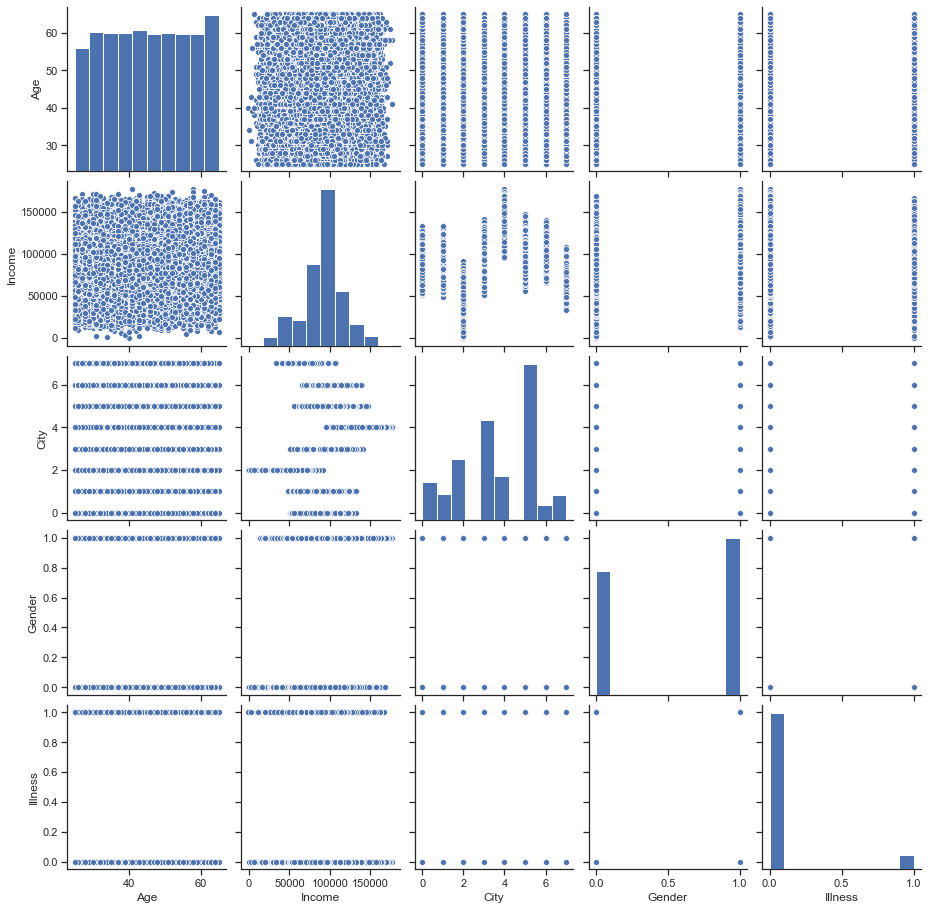

In [153]:
sns.pairplot(merge)

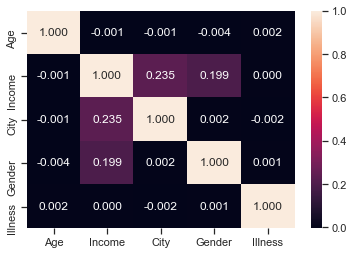

In [154]:
sns.heatmap(merge.corr(), annot=True, fmt='.3f')


### Как видно из корреляционной матрицы, все признаки очень слабо коррелируют. Наибольшую корреляцию демонстрируют пары признаков: City - Income & Gender - Income

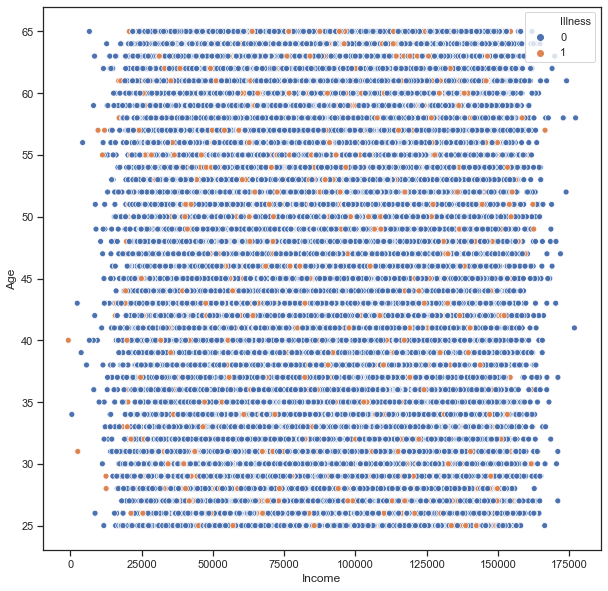

In [161]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Income', y='Age', data=merge, hue='Illness')

### Выбрав в качестве целевого признака критерий болезни, можно убедиться, что уровень дохода с высокой долей вероятности никак не влияет на отсутствие заболевания. Что касается возраста человека, можно выделить очень малозаметное смещение заболеваемости к людям старшего возраста 

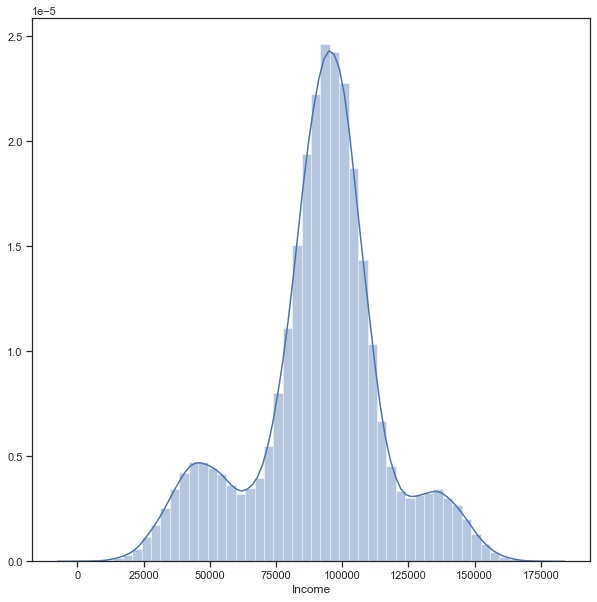

In [162]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.distplot(merge['Income'])

### Набор данных позволяет получить гистограмму распределения дохода. С помощью гистограммы можно говорить о присутствии "легкого" трехмодального распределения с явным преобладанием центральной моды, соответствующей среднему достатку около 95000$

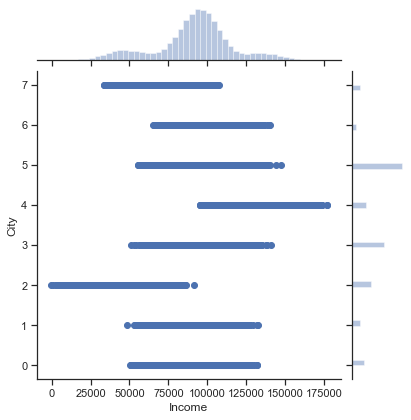

In [165]:
sns.jointplot(x='Income', y='City', data=merge)

### График выше демонстрирует разброс дохода в каждом из городов, присутствующих ввыборке. Наименьший уровень дохода соответствует Далласу, проживающие в Маунтин-Вью могут расчитывать на самый б*о*льший доход

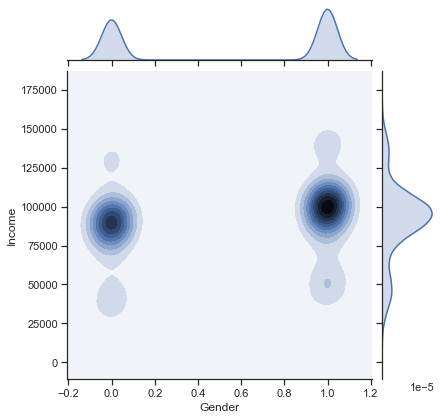

In [164]:
sns.jointplot(x='Gender', y='Income', data=merge, kind="kde")

### График уровня дохода мужчин и женщин

### Ящик с усами 

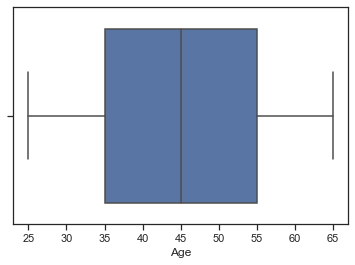

In [156]:
sns.boxplot(x=merge['Age'])

### Ящик с усами отображает распределение вероятности попадания человека в диапазон возрастов

#### В целом можно судить о скудной репрезентативности выборки датасета. Признаки слабо коррелируют между собой. Исходя из этого, довольно затруднительно говорить о построении какой- либо модели машинного обучения.